<a href="https://colab.research.google.com/github/purvikabajaj/Neural-Networks/blob/master/CNN_Happy_vs_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2020-08-10 13:12:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.05s   

2020-08-10 13:12:53 (54.1 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [28]:
import os
import zipfile

In [29]:
local_zip = '/tmp/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/happy-or-sad')
zip_ref.close()

In [30]:
train_happy_dir = os.path.join('/tmp/happy-or-sad/happy')
train_sad_dir = os.path.join('/tmp/happy-or-sad/sad')

In [31]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy2-10.png', 'happy2-13.png', 'happy1-13.png', 'happy2-12.png', 'happy2-06.png', 'happy2-01.png', 'happy2-00.png', 'happy2-18.png', 'happy2-19.png', 'happy1-06.png']
['sad2-09.png', 'sad2-01.png', 'sad1-19.png', 'sad2-19.png', 'sad2-03.png', 'sad2-14.png', 'sad1-06.png', 'sad2-02.png', 'sad1-00.png', 'sad2-00.png']


In [32]:
print('Happy Images: ', len(os.listdir(train_happy_dir)))
print('Sad Images: ', len(os.listdir(train_sad_dir)))

Happy Images:  40
Sad Images:  40


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/happy-or-sad',
    target_size = ( 150,150),
    batch_size = 10,
    class_mode = 'binary'    
)

Found 80 images belonging to 2 classes.


In [43]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

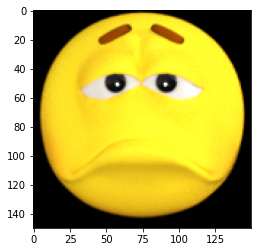

(150, 150, 3)


In [44]:
x, y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  plt.show()
  print(image.shape)

In [36]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [37]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),


                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [39]:
from tensorflow.keras.optimizers import RMSprop

In [40]:
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [41]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 2,
    epochs = 15,
    #callbacks = tf.keras.callbacks.EarlyStopping(monitor='accuracy')
)

Epoch 1/15
2/2 [==============================] - 0s 21ms/step - loss: 1.3325 - accuracy: 0.6000
Epoch 2/15
2/2 [==============================] - 0s 21ms/step - loss: 1.2591 - accuracy: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 21ms/step - loss: 0.6379 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 23ms/step - loss: 0.7270 - accuracy: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 21ms/step - loss: 0.4663 - accuracy: 0.7000
Epoch 6/15
2/2 [==============================] - 0s 21ms/step - loss: 0.5531 - accuracy: 0.6500
Epoch 7/15
2/2 [==============================] - 0s 21ms/step - loss: 0.3703 - accuracy: 0.8500
Epoch 8/15
2/2 [==============================] - 0s 22ms/step - loss: 0.1934 - accuracy: 0.9500
Epoch 9/15
2/2 [==============================] - 0s 21ms/step - loss: 0.2806 - accuracy: 0.9500
Epoch 10/15
2/2 [==============================] - 0s 29ms/step - loss: 0.2160 - accuracy: 0.9500
Epoch 11/15
2/2 [============

In [42]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print('Happy')
  else:
    print('Sad')

Saving 41NIaXRCzVL._AC_SX425_.jpg to 41NIaXRCzVL._AC_SX425_ (1).jpg
[1.]
Happy
